# Homework 5 Solution

Allowed libraries: sklearn, matplotlib, pandas

## Q1- [25 pts]

Load the data from the .csv file into a pandas dataframe, it contains a list of 1200 bitstrings which each have a length of 16 bits. Call the dataset $S$. We call two bitstrings $A$ and $B$ equivalent ($A\sim B$) if you can flip one bit at a time starting from $A$ to produce a sequence of strings $A,s_1, s_2, ..., s_n, B\in S$ that are all within the dataset to get the string $B$. Through this notion of equivalence, we may define an equivalence relation on this set of bit strings. Using agglomerative clustering with a tolerance on distance for early stopping, we can calculate the number of equivalence classes by counting the number of clusters. In order to do this, which linkage rule should be used (single-linkage, complete-linkage, or average-linkage), which distance function should be used (Euclidean distance, Manhattan distance, or cosine distance), and what should the threshold distance be? Explain why you would pick these parameters.

Hints:
- An example of an equivalence:
Let $S=\{0000,0010,0110,1100\}$. $0000\sim 0110$ because there is a sequence of one bit changes you can make to get from $0000$ to $0110$ in $S$: $0000$, $0010$, $0110$. But $1100$ is not equivalent to any of the other ones. So $\{0000,0010,0110\}$ form an equivalence class and $\{1100\}$ is the other, thus there are 2 clusters.
- To use early stopping with tolerance in agglomerative clustering, each time two closest clusters are about to be merged, the distance between those clusters is compared to the tolerance. If the distance is larger than the tolerance, the clusters merge and the algorithm continues, otherwise, they aren't merged and the algorithm terminates.
- To find out which linkage rule to use, think about how you would figure out which equivalence class the string $0001$ belongs to in the previously given example.

### Answer:

In [1]:
import numpy as np
import pandas as pd
S=pd.read_csv("bitstrings.csv", names = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
S.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,0,0
1,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0
2,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0
3,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0
4,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,0


Note: Assume that we are in the middle of performing the agglomerative clustering algorithm, so we have some clusters $C_1,C_2, ..., C_m$. How should we decide which two clusters to combine next? Recall that equivalence relations must satisfy the transitive property (if A\~B and B\~C, then A\~C). So if some bit-string $s_1$ in cluster $C_i$ can be transformed to the bit-string $s_2$ in cluster $C_j$ with one bit-flip, because of the transitive property, we know that every bit-string in $C_i$ must also be equivalent to every bit-string in $C_j$. So when computing distances of clusters, we only need to check to see if at least one string in one cluster can be transformed to a string in the other cluster within one bit-flip.

Distance metric: We would want to use Manhattan distance for this problem (or Euclidean). The reason is because we want to call two bit-strings equivalent if you can transform one to the other through a series of bit flips. We need to make sure that every string within the sequence is only one bit-flip away from the string before it. So we need a way to count how many bit-flips it takes to transform one string to the other. In this case, Manhattan distance metric will calculate this. (In this specific case, Euclidean distance will also work, because we only need to make sure that one bit is flipped. The Manhattan and Euclidean distances return the same distance of 1 if two strings are one bit-flip apart from each other.)

Threshold distance: 1. Using Manhattan distance we know how many bit-flips it takes to change one string to another. But as stated in the Note above, we want to combine clusters if they are one bit-flip apart.

Linkage rule: Single-linkage. From the Note above, we need to make sure that at least one string from one cluster can be transformed to another string in a different cluster in 1 bit-flip. This is the same as saying that there is a string in one cluster that is at most 1 distance away from another string in the other cluster. We can check this by simply checking the shortest distance between any pair of strings from the two clusters, this distance needs to be at most 1. This is the same as the single-linkage rule.

## Q2- [25 pts]

Perform the clustering using the parameters you picked in part a. How many equivalence classes (clusters) are there? Create a bar graph plotting the number of strings in each cluster. (You may need to increase your distance threshold slightly if you don't want the algorithm to terminate when the distance is equal to the threshold.)

### Answer:

[296.0, 194.0, 193.0, 187.0, 100.0, 100.0, 99.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


<BarContainer object of 32 artists>

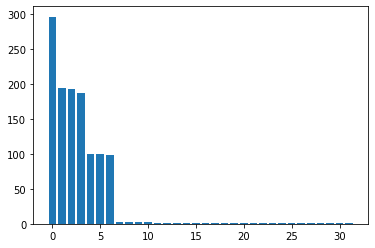

In [2]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

clustering = AgglomerativeClustering(n_clusters=None, affinity="manhattan", linkage="single", distance_threshold=1.01).fit(S)

# Computing size of clusters
bins = np.zeros(clustering.n_clusters_)
for i in clustering.labels_:
    bins[i]+=1

#To make it easier to visualize, sorting in descending order
bins = sorted(bins, reverse=True)
#Print size of clusters
print(bins)
plt.bar(range(0,clustering.n_clusters_), bins)

## Q3- [10 pts]

Using this clustering, determine if the string $0000001101111100$ is equivalent to the string $1011101101111101$. What about string $1001111011001001$ and string $1001111011000000$?

### Answer:

In [3]:
#converting to numpy array for easier row searching
mat = S.to_numpy()

#Finding index of each string
s1=np.where((mat==(0,0,0,0,0,0,1,1,0,1,1,1,1,1,0,0)).all(1))[0][0]
s2=np.where((mat==(1,0,1,1,1,0,1,1,0,1,1,1,1,1,0,1)).all(1))[0][0]
s3=np.where((mat==(1,0,0,1,1,1,1,0,1,1,0,0,1,0,0,1)).all(1))[0][0]
s4=np.where((mat==(1,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0)).all(1))[0][0]

#printing the cluster label of each string. The labels need to be equal for them to be equivalent strings
print(str(clustering.labels_[s1]))
print(str(clustering.labels_[s2]))
print(str(clustering.labels_[s3]))
print(str(clustering.labels_[s4]))

7
7
5
25


As we can see, the first two strings are in the same cluster, so they are equivalent to each other. The next pair of strings are in different clusters, and so they aren't equivalent.

## Q4- [20 pts]

Redo the clustering on the dataset, but this time using both of the other linkage rules (keep everything else the same), and report the number of clusters for both. Is there any difference from your number of clusters in part b? If so, explain why.

### Answer:

In [4]:
clustering2 = AgglomerativeClustering(n_clusters=None, affinity="manhattan", linkage="complete", distance_threshold=1.01).fit(S)
print(clustering2.n_clusters_)

clustering3 = AgglomerativeClustering(n_clusters=None, affinity="manhattan", linkage="average", distance_threshold=1.01).fit(S)
print(clustering3.n_clusters_)

618
617


We can see that the number of clusters rose drastically. In the single-linkage rule, if the closest pair of strings from two clusters are within 1 distance of each other, the two clusters will merge. This makes it fairly easy for clusters to merge, there just needs to be a pair of strings with one different bit in the two clusters. However, in complete-linkage, two clusters are merged if the furthest pair of points within the two clusters are at most 1 distance away. Because we are now comparing to the furthest pair rather than the shortest, this means every string in one cluster needs to be one bit-flip away from every other string in the other cluster. This is very unlikely to happen, and will force small clusters. So the agglomerative clustering will terminate soon. The same problem happens with average distance. Instead we are only comparing average distance, but this will still mean that multiple strings have to be one bit-flip away from a few other strings in the other cluster. This is also very unlikely and will force the algorithm to terminate quickly with small clusters.

## Q5- [20 pts]

Cluster the dataset again, this time using K-means clustering with the number of clusters set to the number you found in part b. Create a bar plot for the size of the clusters. Compare with your plot in part b, how do these results differ? Give an explanation for this difference.

### Answer:

[89.0, 81.0, 78.0, 74.0, 72.0, 68.0, 68.0, 59.0, 58.0, 53.0, 50.0, 49.0, 31.0, 29.0, 26.0, 24.0, 23.0, 22.0, 22.0, 21.0, 20.0, 20.0, 19.0, 19.0, 19.0, 18.0, 18.0, 15.0, 15.0, 14.0, 13.0, 13.0]


<BarContainer object of 32 artists>

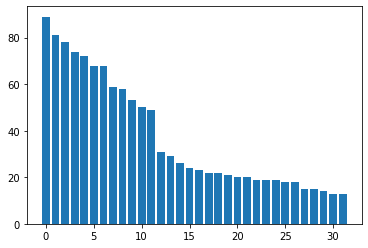

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=clustering.n_clusters_, random_state=0).fit(S)

bins2 = np.zeros(clustering.n_clusters_)
for i in kmeans.labels_:
    bins2[i]+=1

bins2 = sorted(bins2, reverse=True)
print(bins2)
plt.bar(range(0,clustering.n_clusters_), bins2)

There is a lot less variation in the sizes of the clusters compared to the agglomerative clustering algorithm. The larger clusters are smaller than before, and the smaller clusters are larger than before.
Based on the plot from part b, we can see that there are a few large clusters in the dataset, followed by a few random samples that aren't close enough to other strings to create a large equivalence class. So in the KMeans algorithm, we intialize random means. Then as the iterations increase, the means will move closer and closer to the cluster they are trying to capture. But because the structure of our dataset is just a few large clusters with lots of random noise, these means will most likely converge to one of the larger clusters. And there could be multiple means within the same larger cluster, so that's why the larger clusters decreased in size, because they effectively have been split in half because two means converged to that same cluster. Also the means will ignore the random noisy strings, since there aren't enough of them compared to the size of the larger clusters. This explains why the really small clusters no longer exist, since none of the means converged to a small cluster.